In [5]:
from scattnlay import scattnlay, fieldnlay
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [6]:
help(scattnlay)

Help on function scattnlay in module scattnlay.main:

scattnlay(x, m, theta=array([], dtype=float64), nmax=-1, pl=-1, mp=False)
    scattnlay(x, m[, theta, nmax, pl, mp])
    
    Calculate the actual scattering parameters and amplitudes.
    
        x: Size parameters (1D or 2D ndarray)
        m: Relative refractive indices (1D or 2D ndarray)
        theta: Scattering angles where the scattering amplitudes will be
               calculated (optional, 1D ndarray)
        nmax: Maximum number of multipolar expansion terms to be used for the
              calculations. Only use it if you know what you are doing.
        pl: Index of PEC layer. If there is none just send -1.
        mp: Use multiple (True) or double (False) precision.
    
    Returns: (terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2)
    with
        terms: Number of multipolar expansion terms used for the calculations
        Qext: Efficiency factor for extinction
        Qsca: Efficiency factor for scattering
  

In [7]:
# scattering cross-section over collection angle for spherical water droplet

def scattering_curve(size_array, wavelength, collection_direction, collection_angle, deg_step): # returns scattering cross-section over soild angle defined by collection weighting function
    S1, S2, sigma_total = scattnlay_wrap(size_array, wavelength, deg_step)
    differential_sigma = (S1, S1, sigma_total, deg_step)
    
    return values

def differential_sigma(size_array, wavelength, theta_step_degrees): # returns differential scattering cross-section [W.sr^-1]for unpolarised light over 0-pi theta
    curves = [] 
    return curves



def angle_range(): # returns np.array range of angles 
    return

def spherical_normalisation(): # normalises polar curve f over 4pi steradians
#     N = np.trapz(y*np.sin(theta), theta)*2*np.pi
    return N

def scattering_curve_polar(): # returns scattering cross-section over solid angle defined by polar range
    return

def collection_weighting(): # returns 1 if dot(direction(phi, theta), collection_direction) < sin(collection_angle) else 0
    return


def relative_irradiances(x, theta): # arbitraty units
    S1, S2 = droplet_scatteirng_amplitudes(x, theta)
    return phase_function(S1, S2)

def solid_angle_scattered_irradiance(x, theta, theta1, theta2, N=1): # integrate irradiances over solid angle from theta1 to theta2
    rel_irr = relative_irradiances(x, theta) # get irradiances
    irr = rel_irr/N
    (ind1, theta1) = min(enumerate(theta), key=lambda x: abs(theta1 - x[1])) # find closest matching polar angle range
    (ind2, theta2) = min(enumerate(theta), key=lambda x: abs(theta2 - x[1]))
    irr_range = irr[ind1:ind2+1] # integrate over range
    theta_range = theta[ind1:ind2+1]
    return np.trapz(irr_range*np.sin(theta_range), theta_range )*2*np.pi 

def get_size_range(min_um, max_um, um_step):
    return np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 

In [47]:
def scattnlay_wrap(size, wavelength, theta): # returns scattering amplitudes & cross-sections for water droplets
    x = get_size_param(size, wavelength)
    m = complex(1.33 + 0.0j) # water
    terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(np.array([x]), np.array([m]), theta)
    sigma_t = Qsca*np.pi*(size/2)**2
    return sigma_t, S1, S2

def get_size_param(size, wavelength): # returns size parameter of droplet diameter size
    return size*np.pi/wavelength
                   
def get_theta_range(deg_step):
    return np.arange(0, np.pi, np.radians(deg_step))

def get_phi_range(deg_step):
    return np.arange(0, 2*np.pi, np.radians(deg_step))

def phase_function(S1, S2): # unpolarised
    return abs(S1)**2+abs(S2)**2

def phase_normalisation(y, theta):
    return np.trapz(y*np.sin(theta), theta)*2*np.pi

def differential_sigma(size, wavelength, theta):
    sigma_t, S1, S2 = scattnlay_wrap(size, wavelength, theta)
    p = phase_function(S1, S2)
    N = phase_normalisation(p, theta)
    return sigma_t*p/N

def get_size_range(min_um, max_um, um_step):
    return np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 

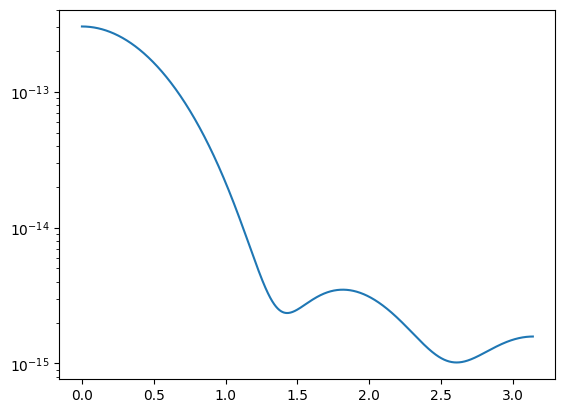

In [48]:
size = 0.26*2*10**-6
wavelength = 550e-9 
theta = get_theta_range(0.1)

dsigma_curve = differential_sigma(size, wavelength, theta)
plt.yscale("log")
plt.plot(theta, dsigma_curve )

In [49]:
get_size_param(size, wavelength)

2.9702330543030766

In [50]:
phase_normalisation(dsigma_curve,theta)

3.6435613779704656e-13

In [51]:
scattnlay_wrap(size, wavelength, theta)

(3.643561377970465e-13,
 array([ 3.78399526-5.00359468j,  3.78398574-5.00357587j,
         3.78395718-5.00351945j, ..., -0.13375842-0.43369232j,
        -0.13374402-0.43370807j, -0.13373538-0.43371752j]),
 array([3.78399526-5.00359468j, 3.78398552-5.00357034j,
        3.7839563 -5.00349734j, ..., 0.13372619+0.43370645j,
        0.1337297 +0.43371435j, 0.1337318 +0.43371909j]))

In [62]:
import time 
t0 = time.time()

theta = get_theta_range(0.02)
phi = get_phi_range(0.02)
sin_theta = np.sin(theta)

intg = np.array([sin_theta]*np.size(phi))
I= np.trapz(np.trapz(intg, theta), phi)




# def f(theta, phi):
#     return np.sin(theta)
# f = sin_theta*np.ones((36000,1))
# f = np.tile(sin_theta, (36000,1))
# f = np.array([sin_theta]*36000)
# THETA, PHI = np.meshgrid(theta, phi)
# f=f(THETA, PHI)
t1 = time.time()
print(I,t1-t0)


12.56567197229535 3.5609381198883057


In [63]:
4*np.pi

12.566370614359172

In [100]:
def distFunc(x,y):
    f = np.exp(-x+y)
    return f

x = np.linspace(.1, 10, 3)
y = np.linspace(.1, 10, 10)
X, Y = np.meshgrid(x, y)

distFunc(X, Y)

array([[1.00000000e+00, 7.08340893e-03, 5.01746821e-05],
       [3.00416602e+00, 2.12797364e-02, 1.50733075e-04],
       [9.02501350e+00, 6.39278612e-02, 4.52827183e-04],
       [2.71126389e+01, 1.92049909e-01, 1.36036804e-03],
       [8.14508687e+01, 5.76949810e-01, 4.08677144e-03],
       [2.44691932e+02, 1.73325302e+00, 1.22773399e-02],
       [7.35095189e+02, 5.20697983e+00, 3.68831674e-02],
       [2.20834799e+03, 1.56426319e+01, 1.10803158e-01],
       [6.63424401e+03, 4.69930632e+01, 3.32871084e-01],
       [1.99303704e+04, 1.41174964e+02, 1.00000000e+00]])

In [95]:
np.trapz(np.ones(np.size(phi)),phi)

6.283010774254388

In [96]:
np.pi*2

6.283185307179586

In [78]:
min_um, max_um, um_step = 1, 50, 0.1 
wavelength = 550e-9
deg_step = 1
size =0.26*2*10**-6
size_array = get_size_array(min_um, max_um, um_step)
scattnlay_wrap(size, wavelength, deg_step)

(2.9702330543030766,
 1.7156532655701693,
 3.643561377970465e-13,
 array([ 3.78399526-5.00359468e+00j,  3.78304329-5.00171430e+00j,
         3.78018835-4.99607629e+00j,  3.77543327-4.98669001e+00j,
         3.76878282-4.97357105e+00j,  3.76024362-4.95674116e+00j,
         3.7498242 -4.93622824e+00j,  3.73753495-4.91206623e+00j,
         3.72338811-4.88429504e+00j,  3.70739777-4.85296046e+00j,
         3.68957985-4.81811404e+00j,  3.66995205-4.77981297e+00j,
         3.64853387-4.73811992e+00j,  3.62534655-4.69310294e+00j,
         3.60041306-4.64483520e+00j,  3.57375807-4.59339493e+00j,
         3.54540791-4.53886512e+00j,  3.51539054-4.48133341e+00j,
         3.48373551-4.42089183e+00j,  3.45047393-4.35763659e+00j,
         3.41563842-4.29166787e+00j,  3.37926308-4.22308957e+00j,
         3.34138343-4.15200906e+00j,  3.30203639-4.07853697e+00j,
         3.2612602 -4.00278688e+00j,  3.2190944 -3.92487512e+00j,
         3.17557974-3.84492045e+00j,  3.1307582 -3.76304383e+00j,
         3

# Validation

validation 1 – scattnlay reporduces BH plot for x = 3

In [4]:
# generate array of size parameters
min_um, max_um, step = 1, 50, 0.1 
wavelength = 632.8e-9 # FSSP

droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))

In [5]:
# generate polar angle array (phase function resolution)
deg_step = 0.5
theta = np.arange(0, np.pi, np.radians(deg_step))

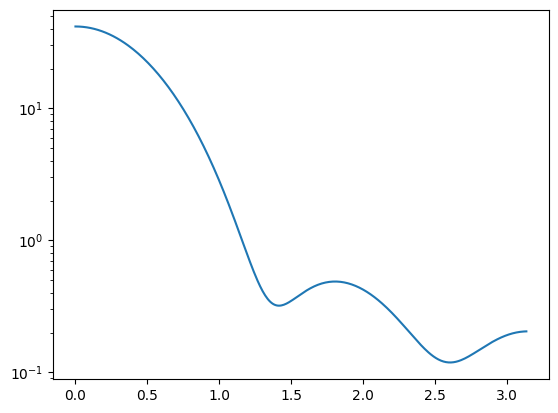

In [6]:
irr = relative_irradiances(np.array([3]), theta)
plt.yscale("log")
plt.plot(theta, irr)

validation 2 – scattnlay reproduces extinction paradox over size parameter range

In [7]:
scat_eff_iter = map(lambda x: droplet_scatteirng_effciency(x, theta), droplet_x)
scat_eff = list(scat_eff_iter)

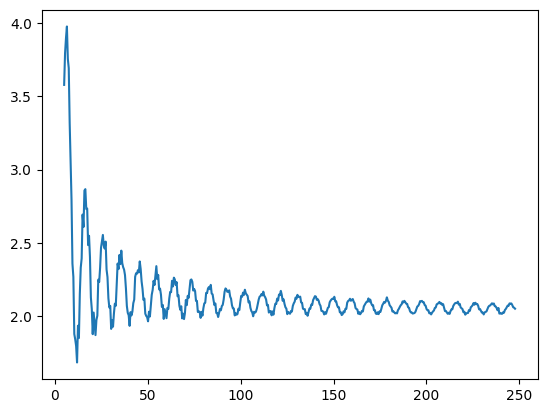

In [8]:
plt.plot(droplet_x,scat_eff)

validation 3 – model reproduces reponse curve for FSSP

In [268]:
theta1_deg, theta2_deg  = 4.6, 12.8 # FSSP
wavelength = 632.8e-9 # FSSP
min_um, max_um, step = 1, 50, 0.1
deg_step = 0.5

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x)
scat_irr = list(scat_irr_iter)

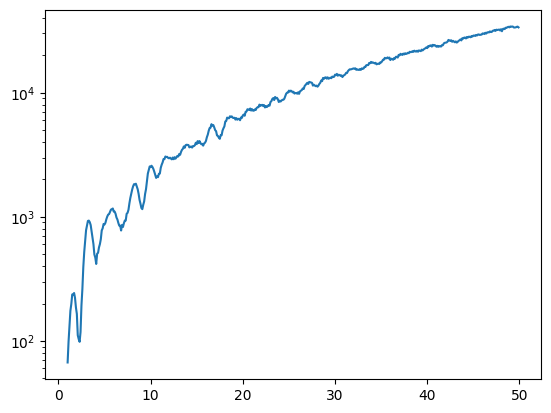

In [269]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

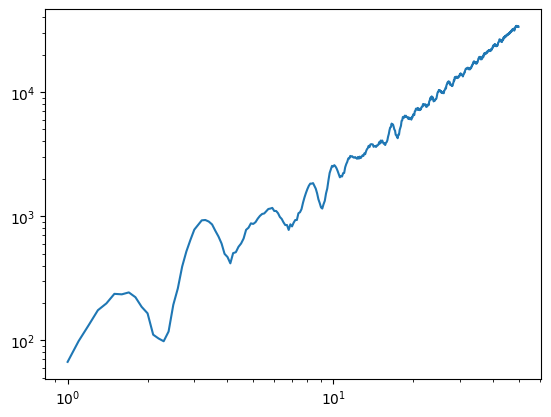

In [270]:
plt.yscale("log")
plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

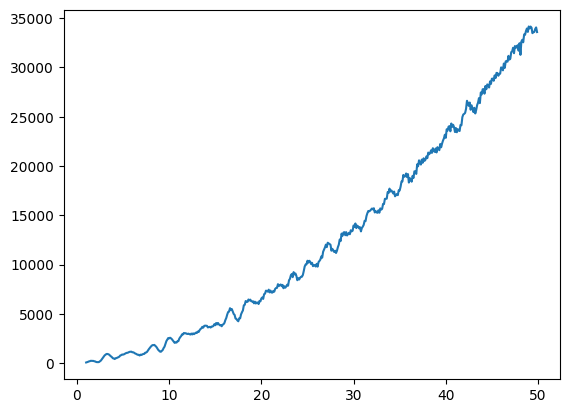

In [271]:
# plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

# BCP response curve

In [15]:
theta1_deg, theta2_deg  = 144, 156 # BCP
wavelength = 658e-9 # BCP
min_um, max_um, step = 1, 50, 0.1
deg_step = 0.1

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x)
scat_irr = list(scat_irr_iter)

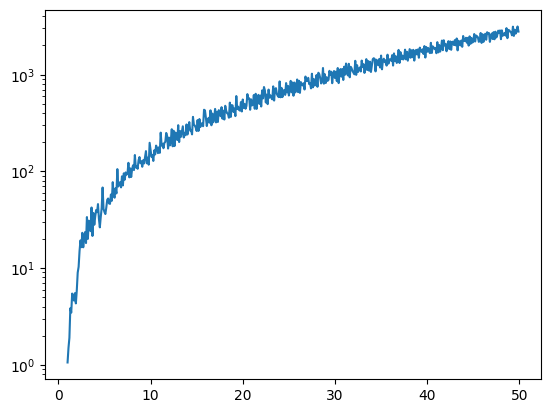

In [16]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

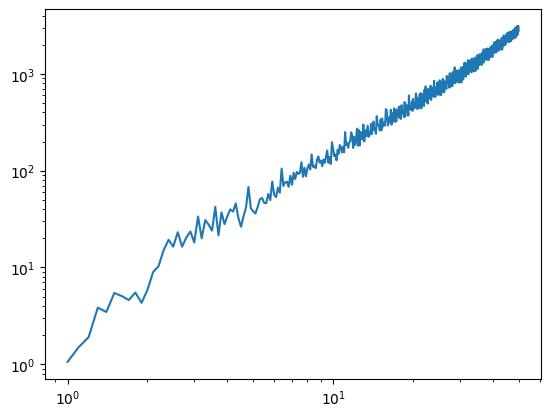

In [17]:
plt.yscale("log")
plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

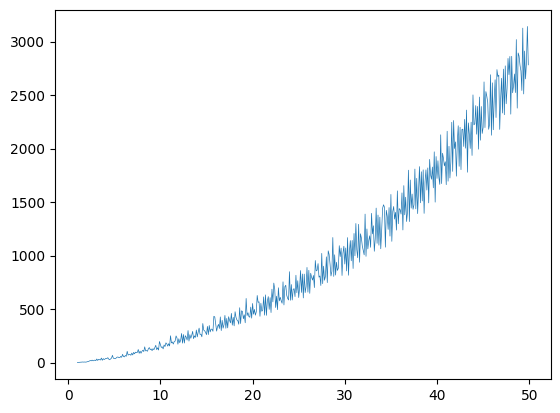

In [18]:
# plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr, linewidth=0.5)

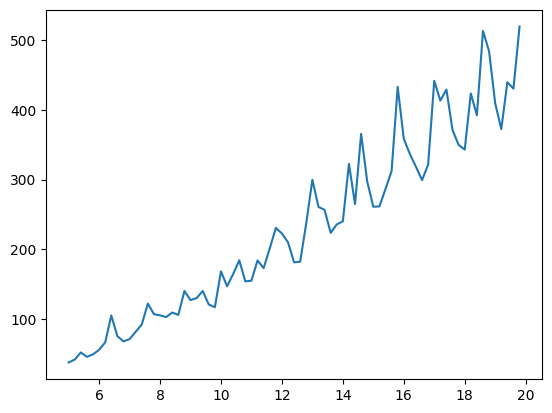

In [280]:
theta1_deg, theta2_deg  = 144, 156 # BCP
wavelength = 658e-9 # BCP
min_um, max_um, step = 5, 20, 0.2
deg_step = 0.5

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x)
scat_irr = list(scat_irr_iter)
plt.plot(droplet_sizes*10**6,scat_irr)

# multiple wavelength

In [182]:
theta1_deg, theta2_deg  = 144, 156 # BCP
# theta1_deg, theta2_deg  = 4.6, 12.8 # FSSP
min_um, max_um, step = 1, 50, 0.1
deg_step = 0.1

theta = np.arange(np.radians(theta1_deg), np.radians(theta2_deg), np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 

# red
wavelength = 635e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_red = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_red)
scat_irr_red = list(scat_irr_iter)

# green
wavelength = 520e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_green = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_green)
scat_irr_green = list(scat_irr_iter)

# blue
wavelength = 405e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_blue = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_blue)
scat_irr_blue = list(scat_irr_iter)

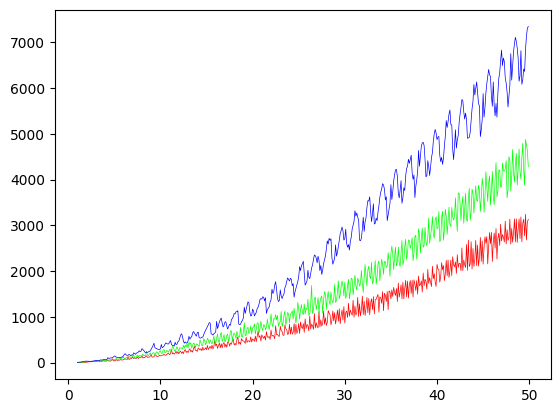

In [183]:
plt.plot(droplet_sizes*10**6,scat_irr_red, color='red', linewidth=0.5)
plt.plot(droplet_sizes*10**6,scat_irr_green, color='lime', linewidth=0.5)
plt.plot(droplet_sizes*10**6,scat_irr_blue, color='blue', linewidth=0.5)

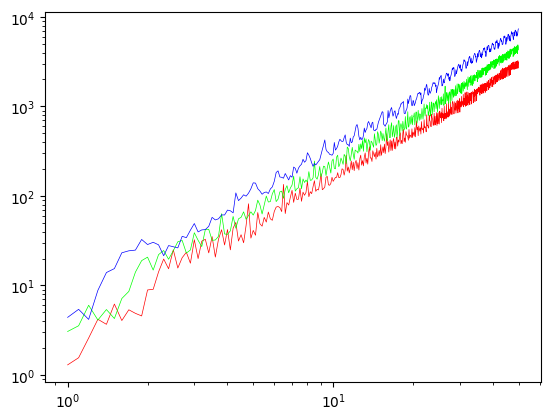

In [184]:
plt.yscale("log")
plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr_red, color='red', linewidth=0.5)
plt.plot(droplet_sizes*10**6,scat_irr_green, color='lime', linewidth=0.5)
plt.plot(droplet_sizes*10**6,scat_irr_blue, color='blue', linewidth=0.5)

# Backscatter angle search

In [5]:
# create a sliding window range of angles
window_size_deg = 12 
window_step_deg = 1
theta1s = np.arange(np.radians(135), np.radians(180-window_size_deg), np.radians(window_step_deg))
theta2s = theta1s+np.radians(window_size_deg)

# calculate the backscatter curve for each window
min_um, max_um, step_um = 1, 50, 0.1
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step_um*10**-6) 
irr_step_deg = 0.5
wavelength = 658e-9
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(droplet_x_iter)

scat_irrs = []
for theta1, theta2 in zip(theta1s, theta2s):
    theta = np.arange(theta1, theta2, np.radians(irr_step_deg))
    scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, theta1, theta2), droplet_x)
    scat_irr = list(scat_irr_iter)
    scat_irrs.append(scat_irr)

In [6]:
# calculate the correlation coefficient for each backscatter curve
corr_coefs_log = list(map(lambda scat_irr: np.corrcoef(np.log(droplet_sizes),np.log(scat_irr))[0,1], scat_irrs))
corr_coefs = list(map(lambda scat_irr: np.corrcoef(droplet_sizes,scat_irr)[0,1], scat_irrs))

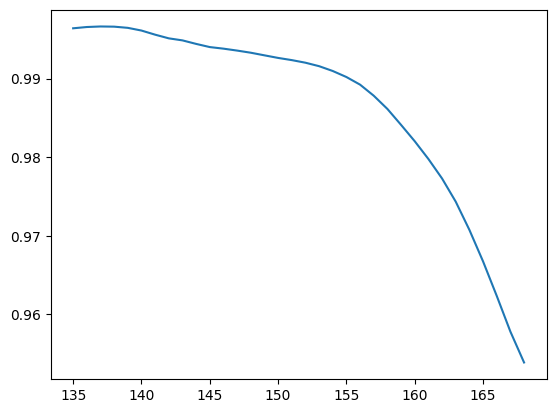

In [7]:
coefs = corr_coefs_log
plt.plot(np.degrees(theta1s),coefs)

2 137 149


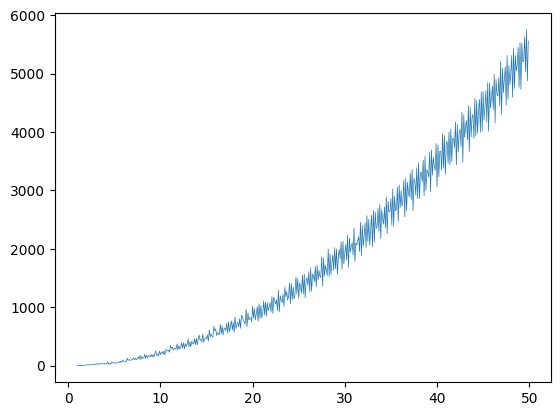

In [18]:
ind = coefs.index(max(coefs))
print(ind, round(np.degrees(theta1s[ind])), round(np.degrees(theta2s[ind])))
plt.plot(droplet_sizes*10**6,scat_irrs[ind], linewidth=0.5)


9 144 156


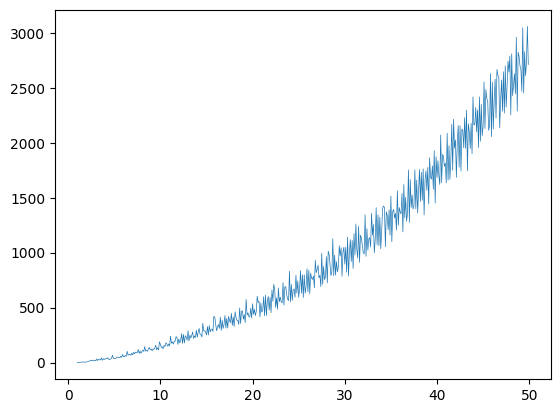

In [19]:
ind = 9
print(ind, round(np.degrees(theta1s[ind])), round(np.degrees(theta2s[ind])))
plt.plot(droplet_sizes*10**6,scat_irrs[ind], linewidth=0.5)

In [13]:
len(scat_irrs)

34

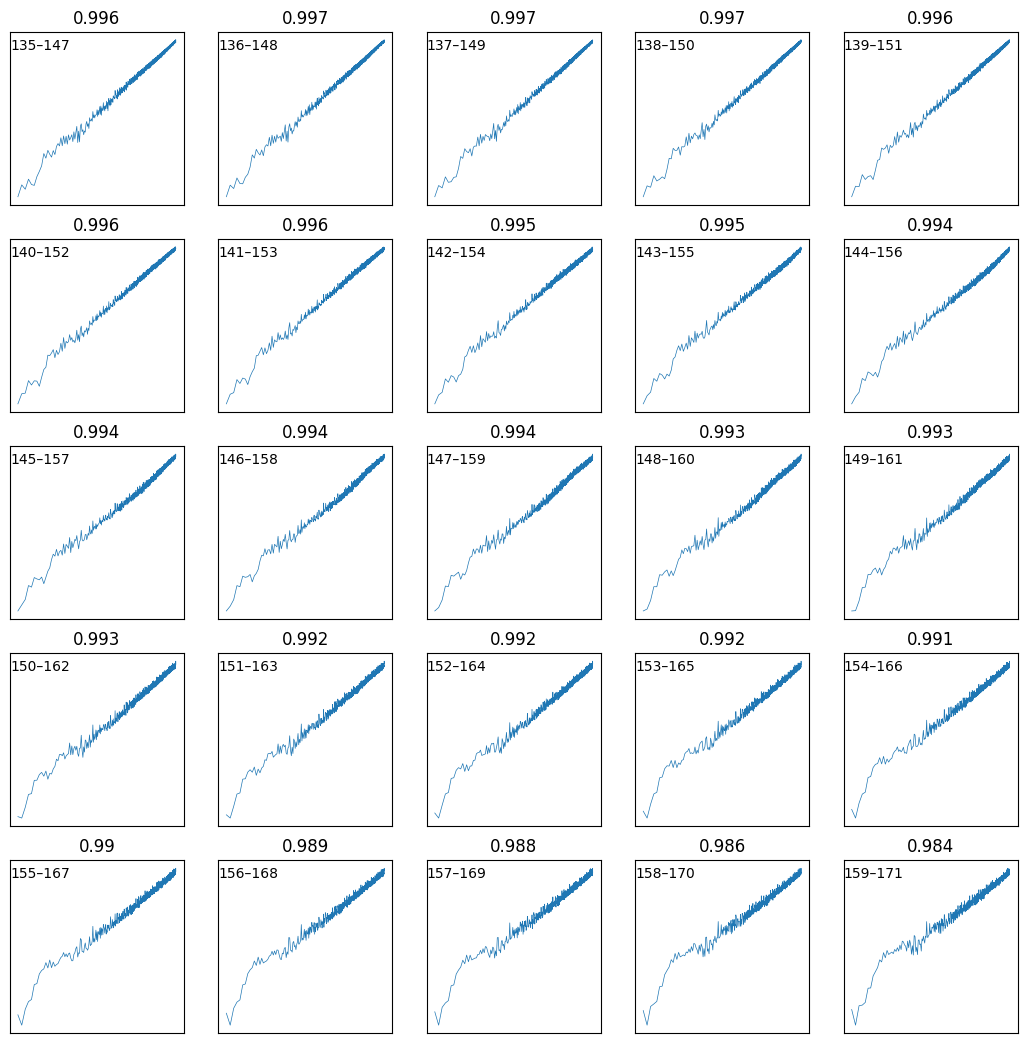

In [21]:
fig, axes = plt.subplots(5,5)
for i, ax in enumerate(np.ndarray.flatten(axes)):
    ax.plot(np.log(droplet_sizes*10**6),np.log(scat_irrs[i]), linewidth=0.5)
    ax.title.set_text(str(round(coefs[i],3)))
    ax.text(0,0.9,str(round(np.degrees(theta1s[i])))+"–"+str(round(np.degrees(theta2s[i]))),transform=ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])
fig.set_size_inches(13,13)

In [210]:
scat_curve = scat_irrs[2]

z = np.polyfit(droplet_sizes*10**6, scat_curve,2)
p = np.poly1d(z)

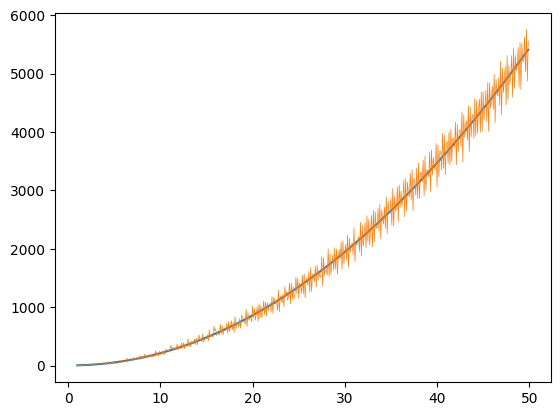

In [49]:
plt.plot(droplet_sizes*10**6,p(droplet_sizes*10**6))
plt.plot(droplet_sizes*10**6,scat_curve,linewidth=0.5) 

In [211]:
SStot = np.var(scat_curve)*np.shape(scat_curve)[0]
SSres = np.sum((p(droplet_sizes*10**6) - scat_curve)**2)
Rsq = 1-SSres/SStot
Rsq

0.9878449193188734

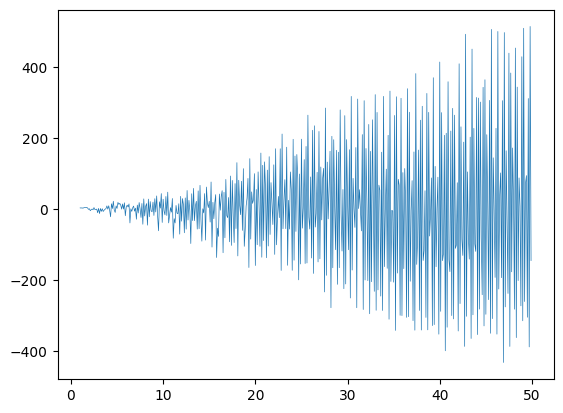

In [50]:
plt.plot(droplet_sizes*10**6,(p(droplet_sizes*10**6) - scat_curve), linewidth=0.5)

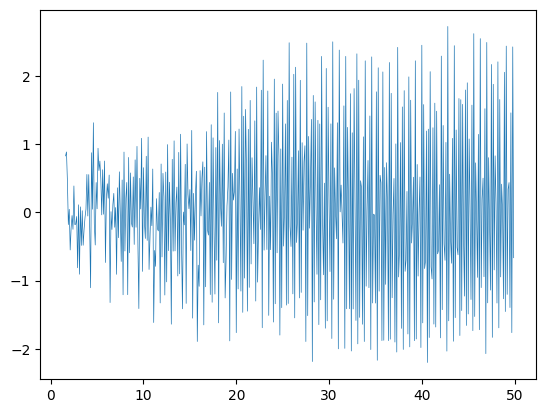

In [165]:
e_um = []
x_um = np.round(np.arange(1,50,0.1),2)
for size in x_um:
# for each droplet size get the irradiance value
    ind = list(np.round(droplet_sizes*10**6,2)).index(size)
    irr_size = scat_irr[ind]
    
    # for the irradiance value invert the model to find the model size
    p_size = (p-irr_size).roots.max()
    
    # take the difference between the droplet size and predicited droplet size
    if isinstance(p_size, complex):
        e_um.append(np.nan)
    else:
        e_um.append(size-p_size)
plt.plot(x_um, e_um, linewidth=0.5)

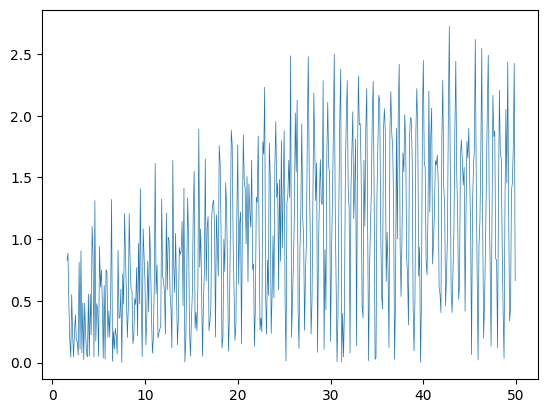

In [166]:
plt.plot(x_um, np.abs(e_um), linewidth=0.5)

measured irr value -> increment 1 bin OR two spanning bins by 0.5 

for equal bins:
±2.5um size mapping uncertainty –> 10 5um bins

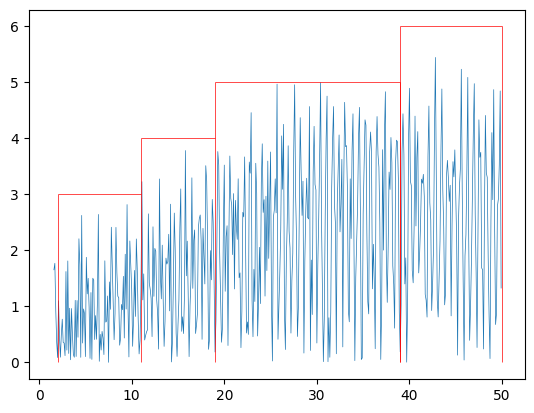

In [218]:
plt.plot(x_um, np.abs(e_um)*2, linewidth=0.5)
plt.vlines(2,0,3, color='red', linewidth=0.5)
plt.vlines(11,0,4, color='red', linewidth=0.5)
plt.vlines(19,0,5, color='red', linewidth=0.5)
plt.vlines(39,0,5, color='red', linewidth=0.5)
plt.vlines(39,0,6, color='red', linewidth=0.5)
plt.vlines(50,0,6, color='red', linewidth=0.5)

plt.hlines(3,2,11, color='red', linewidth=0.5)
plt.hlines(4,11,19, color='red', linewidth=0.5)
plt.hlines(5,19,39, color='red', linewidth=0.5)
plt.hlines(6,39,50, color='red', linewidth=0.5)

2 - 11um : 9um range , 3um bins, 3 bins\
11 - 19um : 8um range, 4um bins, 2 bins\
19 - 39um : 20um range, 5um bins, 4 bins\
39 - 51um : 12um range, 6um bins, 2 bins\

11 bins

In [219]:
3+2+4+2

11

(array([ 21.,  41.,  87., 129., 170., 161., 163., 116.,  55.,  30.,  13.]),
 array([ 1.        ,  5.45454545,  9.90909091, 14.36363636, 18.81818182,
        23.27272727, 27.72727273, 32.18181818, 36.63636364, 41.09090909,
        45.54545455, 50.        ]),
 <BarContainer object of 11 artists>)

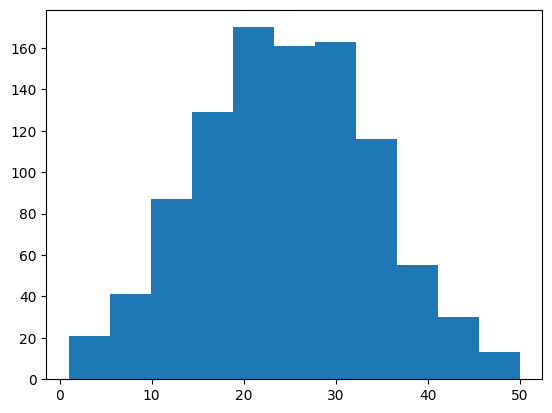

In [250]:
s = np.random.normal(loc= 25, scale= 10, size = 1000)
plt.hist(s, bins = 11, range=(1,50))